## 1. Scala与数据说明
<p>Scala是一种成熟的编程语言，它拥有近30k的提交量和十多年的历史，是一种成熟的编程语言。它是一种通用编程语言，最近成为数据科学家的另一种重要语言。
<p>Scala也是一个开放源码项目。开放源码项目的优势在于，它们的整个开发历史 -- -- 谁做了修改，修改了什么，代码审查等 -- -- 都是公开的。</p>
<p>对Scala的真实项目库进行解读、清理，并将其可视化，这个真实的项目库跨越了版本控制系统（Git）以及项目托管网站（GitHub）的数据。可以了解谁对其发展影响最大等。
<p>使用的数据集是之前从GitHub上挖掘和提取的，2018年1月收集，由三个文件组成：</p></p>
<ol>
<li><code>pulls_2011-2013.csv</code>包含了有关拉取请求的基本信息，时间跨度从2011年底到2014年（但不包括）。
<li><code>pulls_2014-2018.csv</code>包含相同的信息，时间跨度从2014年到2018年。
<li><code>pull_files.csv</code>包含每个拉取请求所修改的文件。
</Ƙ

In [10]:
import pandas as pd
from matplotlib import pyplot 
%matplotlib inline

In [7]:
#读取数据
pulls_one = pd.read_csv('datasets/pulls_2011-2013.csv')
pulls_two = pd.read_csv('datasets/pulls_2014-2018.csv')
pull_files = pd.read_csv('datasets/pull_files.csv')
display(pull_files.head())
display(pulls_one.head())

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


## 2. 准备和清理数据
<p>首先将2011-2013与2014-2018合并</p>
<p>然后注意到从GitHub中提取的原始数据包含ISO8601格式的日期。然而，<code>pandas</code>将其导入为正则字符串，需要将这些字符串转换为Python的<code>DateTime</code>对象。
<p>最后拉取请求时间都是以 UTC（也称为世界时）为单位，但是提交时间是以作者的本地时间为单位，并带有时区信息（与UTC相差的小时数），为了便于比较，将所有时间转换为UTC。

In [4]:
pulls = pd.concat([pulls_one,pulls_two])
pulls['date'] =pd.to_datetime(pulls['date'],utc=True)

## 3. 合并
<P>将pulls与pull_files合并

In [8]:
data = pd.merge(pulls,pull_files,on='pid')
data.head()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


## 4. 该项目是否还在积极维护？
<p>一个开放源码项目的活跃度不是很一致的。有些项目在最初发布后可能会活跃很多年，而另一些项目则会慢慢地渐渐消失。在投入到一个项目中去之前，了解项目的状态是非常重要的。是稳步发展，还是出现了下滑？该项目是否已经完全放弃了？
<p>可以通过每个月提交的的pull请求数量来判断项目的维护情况

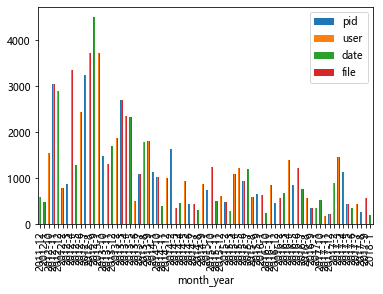

In [13]:
#新建一个column来表示年月
data['month_year'] = data.apply(lambda x: str(x['date'].year) + '-' + str(x['date'].month),axis=1)
counts = data.groupby('month_year').count()
counts.plot(kind='bar')

## 5. 项目中新贡献者多吗？
<P>绘制出每个用户提交的拉动请求数量的柱状图。如果分布图显示只有少数人提交了少量的拉动请求，则可以作为项目不欢迎新贡献者的指标。</p>

,pid,date,file,month_year
user,,,,
0xmohit,2,2,2,2
193s,4,4,4,4
2m,20,20,20,20
4.00E+06,22,22,22,22
AlexeyIvanov8,2,2,2,2


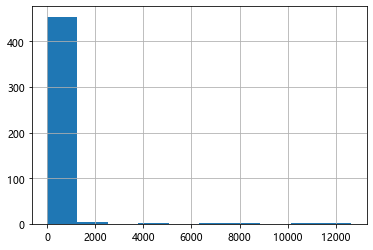

In [17]:
by_user = data.groupby('user').count()
display(by_user.head())
by_user['pid'].hist()

## 6. 在过去的10个pull请求中，都修改了哪些文件？

In [18]:
last_10 = pulls.nlargest(10,'date')

joined_pr = last_10.merge(pull_files,on='pid')
# joined_pr.head()
# Identify the unique files
files = set(joined_pr['file'])
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## 7. 谁对某个文件提出的拉取请求最多？
<p>比如<code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code>最近被修改了，前3名修改了该文件的开发者是谁？这些开发者最有可能对代码有比较好的理解。

In [19]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = data[data['file']==file]
author_counts = file_pr.groupby('user').count()

author_counts.nlargest(3,'file')

,pid,date,file,month_year
user,,,,
xeno-by,11,11,11,11
retronym,5,5,5,5
soc,4,4,4,4


## 8. 谁在给定的文件上提出了最后十个拉取请求？
<p>继续查看<code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code>.的历史记录。

In [20]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

file_pr = data[data['file']==file]
joined_pr = file_pr.merge(pulls,on='pid')
users_last_10 = set(joined_pr.nlargest(10,'date_x')['user_x'])

users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## 9. 两个特殊的人

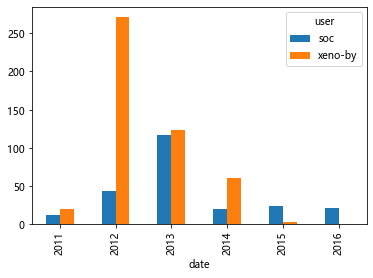

In [21]:
authors = ['xeno-by', 'soc']
by_author = pulls[pulls['user'].isin(authors)]

counts = by_author.groupby(['user',by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

counts_wide.plot(kind='bar')

## 10. 可视化每个开发者的贡献
<p>如前所述，区分全局的专业知识和贡献级别和更细化的贡献级别（文件、子模块等）很重要。通过提交影响该文件的拉动请求的数量和最近提交的拉动请求的数量来衡量经验。

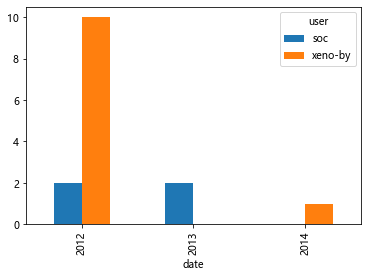

In [29]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
by_author = data[data['user'].isin(authors)]
by_file = by_author[by_author['file']==file]
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date',columns='user',values='pid',fill_value=0)
by_file_wide.plot(kind='bar')